<a href="https://colab.research.google.com/github/nexustech101/colab-notebooks/blob/main/Cities_And_States_Gragh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

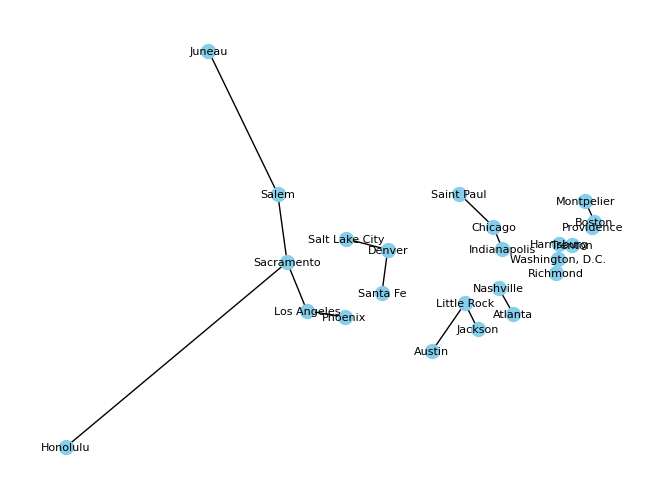

In [ ]:
import networkx as nx
import math
import matplotlib.pyplot as plt

class CityGraph:
    def __init__(self):
        self.graph = nx.Graph()

    def add_city(self, city_name, lon, lat, state):
        self.graph.add_node(city_name, longitude=lon, latitude=lat, state=state)

    def add_road(self, city1, city2, distance):
        self.graph.add_edge(city1, city2, distance=distance)

    def haversine_distance(self, lon1, lat1, lon2, lat2):
        # Haversine formula to calculate the great-circle distance
        R = 6371  # Radius of Earth in kilometers
        dlon = math.radians(lon2 - lon1)
        dlat = math.radians(lat2 - lat1)
        a = (math.sin(dlat / 2) ** 2 +
             math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
             math.sin(dlon / 2) ** 2)
        c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
        distance = R * c
        return distance

    def calculate_and_add_nearest_neighbors(self):
        cities = list(self.graph.nodes)
        for i, city1 in enumerate(cities):
            lon1, lat1 = self.graph.nodes[city1]['longitude'], self.graph.nodes[city1]['latitude']
            nearest_city = None
            min_distance = float('inf')
            for j, city2 in enumerate(cities):
                if i != j:
                    lon2, lat2 = self.graph.nodes[city2]['longitude'], self.graph.nodes[city2]['latitude']
                    distance = self.haversine_distance(lon1, lat1, lon2, lat2)
                    if distance < min_distance:
                        min_distance = distance
                        nearest_city = city2
            if nearest_city:
                self.add_road(city1, nearest_city, min_distance)

    def visualize_graph(self):
        pos = {city: (data['longitude'], data['latitude']) for city, data in self.graph.nodes(data=True)}
        nx.draw(self.graph, pos, with_labels=True, node_size=100, node_color='skyblue', font_size=8)
        edge_labels = nx.get_edge_attributes(self.graph, 'distance')
        nx.draw_networkx_edge_labels(self.graph, pos, edge_labels='')
        plt.show()

# Initialize the CityGraph
city_graph = CityGraph()

# Define U.S. state capitals and their coordinates
capitals = {
    'Atlanta': (-84.3880, 33.7490, 'Georgia'),
    'Austin': (-97.7431, 30.2672, 'Texas'),
    'Boston': (-71.0589, 42.3601, 'Massachusetts'),
    'Chicago': (-87.6298, 41.8781, 'Illinois'),
    'Denver': (-104.9903, 39.7392, 'Colorado'),
    'Harrisburg': (-76.8810, 40.2732, 'Pennsylvania'),
    'Honolulu': (-157.8583, 21.3069, 'Hawaii'),
    'Indianapolis': (-86.1581, 39.7684, 'Indiana'),
    'Jackson': (-90.1848, 32.2988, 'Mississippi'),
    'Juneau': (-134.4197, 58.3019, 'Alaska'),
    'Little Rock': (-92.2896, 34.7465, 'Arkansas'),
    'Los Angeles': (-118.2437, 34.0522, 'California'),
    'Montpelier': (-72.5754, 44.2601, 'Vermont'),
    'Nashville': (-86.7816, 36.1627, 'Tennessee'),
    'Phoenix': (-112.0740, 33.4484, 'Arizona'),
    'Providence': (-71.4128, 41.8240, 'Rhode Island'),
    'Richmond': (-77.4360, 37.5407, 'Virginia'),
    'Sacramento': (-121.4944, 38.5816, 'California'),
    'Saint Paul': (-93.2650, 44.9778, 'Minnesota'),
    'Salem': (-123.0351, 44.9429, 'Oregon'),
    'Salt Lake City': (-111.8315, 40.7608, 'Utah'),
    'Santa Fe': (-105.9378, 35.6869, 'New Mexico'),
    'Trenton': (-74.7429, 40.2206, 'New Jersey'),
    'Washington, D.C.': (-77.0369, 38.9072, 'District of Columbia')
}

# Add capitals to the graph
for city, (lon, lat, state) in capitals.items():
    city_graph.add_city(city, lon, lat, state)

# Calculate and add distances to nearest neighbors
city_graph.calculate_and_add_nearest_neighbors()

# Visualize the graph
city_graph.visualize_graph()
